**Afshar - Q2**

در این سوال ابتدا دو فایل صوتی خوانده میشود
سپس باید تبدیل فوریه این دو فایل محاسبه شود و جای فاز و دامنه صوت ها عوض شود، درنهایت سیگنال
های جدید ساخته می شوند.
سپس مجدد این کار برای دو عکس داده شده انجام می شود که نشان‌دهنده تاثیر جابجایی فاز و دامنه است. خروجی شامل
صوت های تغییر کرده و همچنین تصاویر تغییر یافته می باشد. در مرحله آخر هم تاثیر
اضافه کردن نویز به فاز و دامنه مورد بررسی قرار گرفته است.

در ۲ تصویر اول شکل زمانی دو سیگنال صوتی داده شده را مشاهده میکنید.


دو تصویر آخر به ترتیب خروجی حاصل از ترکیب دامنه سیگنال اول و فاز سیگنال دوم و ترکیب دامنه سیگنال دوم و فاز سیگنال اول است.

Text(0, 0.5, 'Amplitude')

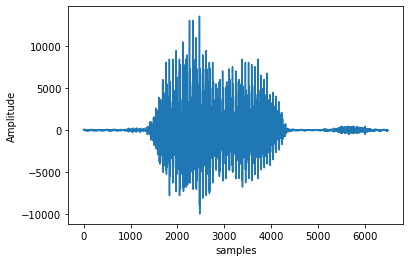

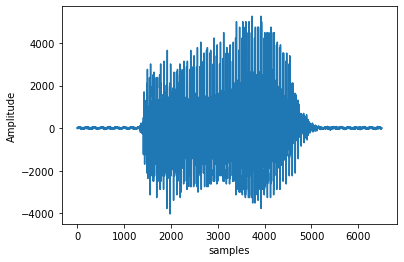

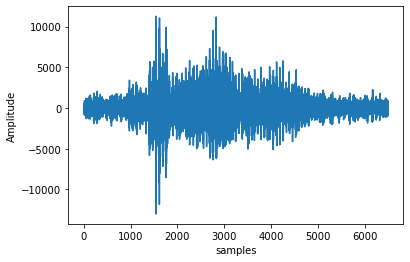

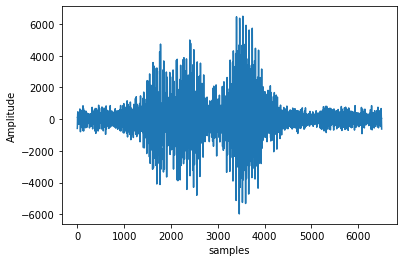

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import os

# part1
fs1, x1 = wavfile.read('1.wav')
fs2, x2 = wavfile.read('2.wav')

plt.figure()
plt.plot(x1)
plt.xlabel('samples')
plt.ylabel('Amplitude')

plt.figure()
plt.plot(x2)
plt.xlabel('samples')
plt.ylabel('Amplitude')

X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)

magX1 = np.abs(X1)
magX2 = np.abs(X2)

angX1 = np.angle(X1)
angX2 = np.angle(X2)

X3 = magX1*np.exp(1j*angX2)
X4 = magX2*np.exp(1j*angX1)

x3 = np.fft.ifft(X3)
x4 = np.fft.ifft(X4)

plt.figure()
plt.plot(np.real(x3))
plt.xlabel('samples')
plt.ylabel('Amplitude')

plt.figure()
plt.plot(np.real(x4))
plt.xlabel('samples')
plt.ylabel('Amplitude')


**لازم به ذکر است**

برای شنیدن هر دو صوت، باید یکی را کامنت کنید تا دیگری را بشنوید.

In [ ]:
#part 2
from IPython.display import Audio

Audio(x3, rate=fs1)
Audio(x4, rate=fs2)


Audio x4 is like 1.wav


Audio x3 is like 2.wav

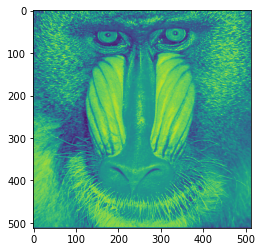

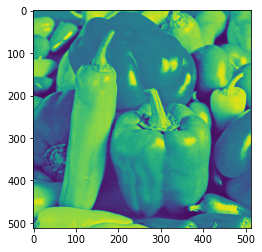

In [ ]:
#part3
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib import pyplot as plt
from PIL import Image

# Read the images
I1 = Image.open('Baboon.bmp')
I2 = Image.open('Peppers.bmp')

# Show the images
plt.figure()
plt.imshow(I1)

plt.figure()
plt.imshow(I2)

# Compute the FFTs and magnitudes
FI1 = fftshift(fft2(I1))
FI2 = fftshift(fft2(I2))

magI1 = np.abs(FI1)
magI2 = np.abs(FI2)

angI1 = np.angle(FI1)
angI2 = np.angle(FI2)

# Compute the new FFTs
FI3 = magI1 * np.exp(1j*angI2)
FI4 = magI2 * np.exp(1j*angI1)

# Compute the new images
I3 = np.real(ifft2(fftshift(FI3)))
I4 = np.real(ifft2(fftshift(FI4)))


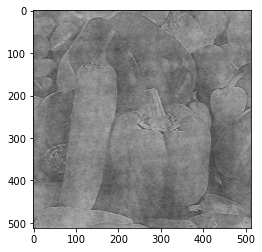

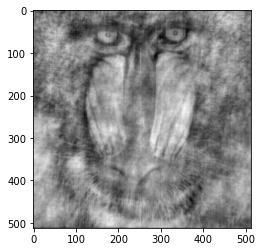

In [ ]:
plt.figure()
plt.imshow(I3, cmap='gray')

plt.figure()
plt.imshow(I4, cmap='gray')

plt.show()


خروجی دوم شباهت بیشتری به عکس حیوان دارد و خروجی اول بیشتر شبیه به عکس فلفل است.

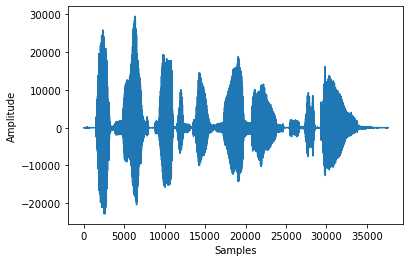

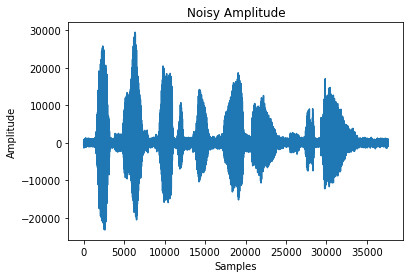

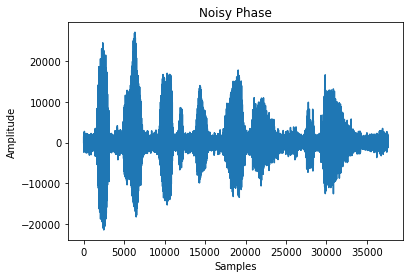

In [ ]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import chirp

# Read the wav file
Fs, x_test = wav.read('test.wav')

# Plot the samples
plt.figure()
plt.plot(x_test)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Compute the FFT
X_test = fftshift(fft(x_test))

# Compute the magnitude and angle
mag_X_test = np.abs(X_test)
ang_X_test = np.angle(X_test)

# Add noise to the magnitude and angle
mag_X_test_n = np.random.normal(0,np.std(mag_X_test)/5, len(mag_X_test)) + mag_X_test
ang_X_test_n = np.random.normal(0,np.std(ang_X_test)/5, len(ang_X_test)) + ang_X_test

# Recovered signals
AMP_rec = mag_X_test_n * np.exp(1j*ang_X_test)
ANG_rec = mag_X_test * np.exp(1j*ang_X_test_n)

# Compute the ifft
amp_rec = np.real(ifft(fftshift(AMP_rec)))
ang_rec = np.real(ifft(fftshift(ANG_rec)))

# Plot the recovered signals
plt.figure()
plt.plot(amp_rec)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noisy Amplitude')

plt.figure()
plt.plot(ang_rec)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noisy Phase')

# Play the sound
from IPython.display import Audio

Audio(amp_rec, rate=Fs)
Audio(ang_rec, rate=Fs)


همان‌طور که دیده می‌شود در تصاویر تغییر دامنه و فاز تاثیر گذار بوده و تصویر با تصویر قبل خیلی متفاوت می شود. در صوت نیز
تاثیر فاز تقریبا ناچیز است.

ولی به شخصه در این مثال در صوتی که شخص میگفت :یک، شاید اگر فایل صوت اصلی را نمی‌شنیدم متوجه نمی‌شدم که در صوت دومی که در خروجی شنیدم چه می‌گوید.